In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_rent = pd.read_csv('data_frame_rent_final.csv')

In [3]:
df_rent.head()

,Price,Prop_type,Size,Bath,Bed,Term,City,Division
0,950,2,57,1,1.0,/ Monthly,Cascais,Cascais e Estoril
1,1900,2,139,2,3.0,/ Monthly,Cascais,São Domingos de Rana
2,1900,2,139,2,3.0,/ Monthly,Cascais,São Domingos de Rana
3,850,2,55,1,2.0,/ Monthly,Lisboa,Olivais
4,2350,2,112,2,2.0,/ Monthly,Lisboa,Arroios


In [4]:
df_rent['Bed'] = df_rent['Bed'].astype('int64')
df_rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 906 entries, 0 to 905
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      906 non-null    int64 
 1   Prop_type  906 non-null    int64 
 2   Size       906 non-null    int64 
 3   Bath       906 non-null    int64 
 4   Bed        906 non-null    int64 
 5   Term       906 non-null    object
 6   City       906 non-null    object
 7   Division   906 non-null    object
dtypes: int64(5), object(3)
memory usage: 56.8+ KB


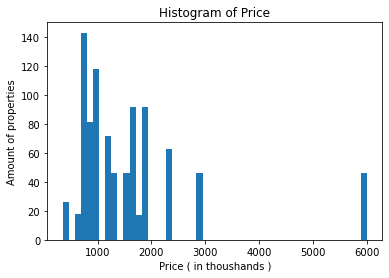

In [6]:
plt.hist(df_rent['Price'], bins=50)
plt.title('Histogram of Price')
plt.xlabel('Price ( in thoushands )')
plt.ylabel('Amount of properties')
plt.show()

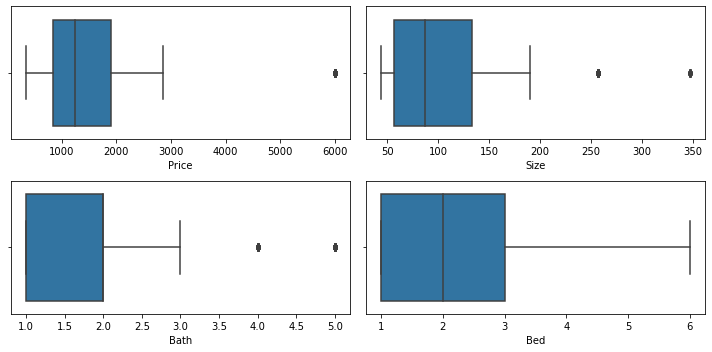

In [7]:
# Outlier Analysis
fig, axs = plt.subplots(2,2, figsize = (10,5))
plt1 = sns.boxplot(df_rent['Price'], ax = axs[0,0])
plt2 = sns.boxplot(df_rent['Size'], ax = axs[0,1])
plt1 = sns.boxplot(df_rent['Bath'], ax = axs[1,0])
plt2 = sns.boxplot(df_rent['Bed'], ax = axs[1,1])

plt.tight_layout()


<AxesSubplot:xlabel='Size', ylabel='Price'>

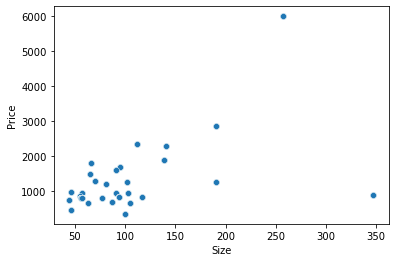

In [8]:
sns.scatterplot(x=df_rent['Size'], y=df_rent['Price'])

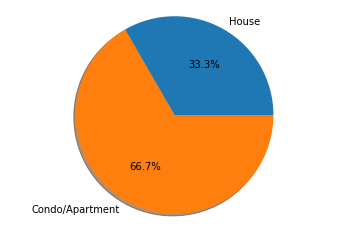

In [9]:
data = [1,2]
labels = ['House','Condo/Apartment']
plt.pie(data,labels=labels, autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.show()

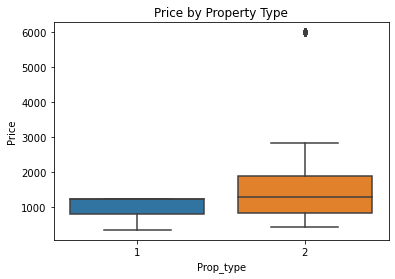

In [13]:
# Boxplot of Price by Property Type
sns.boxplot(x="Prop_type", y="Price", data=df_rent)
plt.title('Price by Property Type')
plt.show()

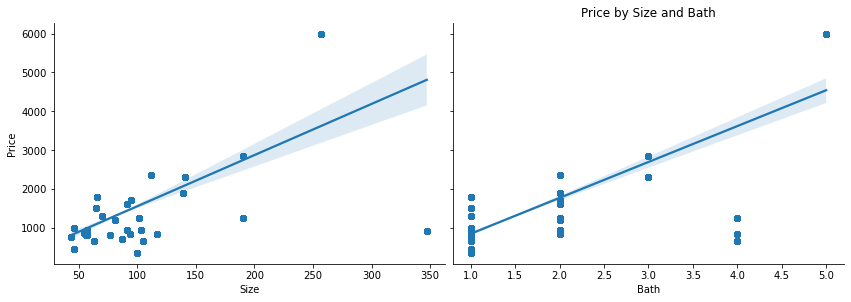

In [12]:
# Pairplot of Price by Size and Bath
sns.pairplot(data=df_rent, x_vars=['Size', 'Bath'], y_vars='Price', kind='reg', height=4, aspect=1.5)
plt.title('Price by Size and Bath')
plt.show()

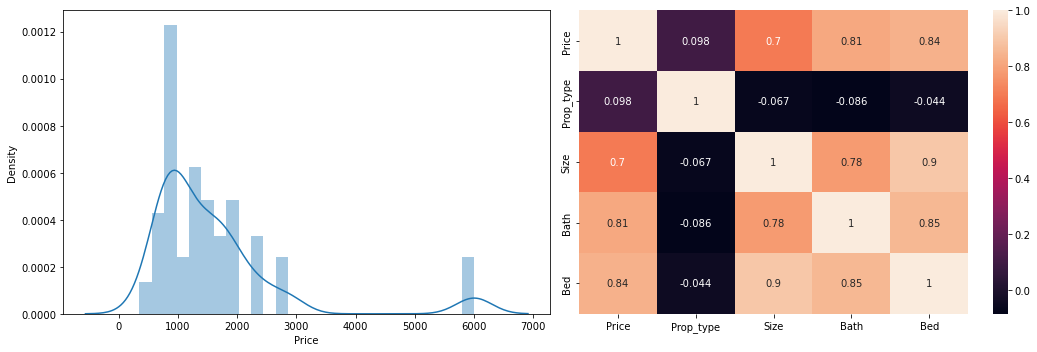

In [14]:
# histogram and heat map
corr = df_rent.corr()
fig, axs = plt.subplots(1,2, figsize=[15,5])
sns.distplot(df_rent['Price'], ax=axs[0])
sns.heatmap(corr, ax=axs[1], annot=True)
fig.tight_layout()


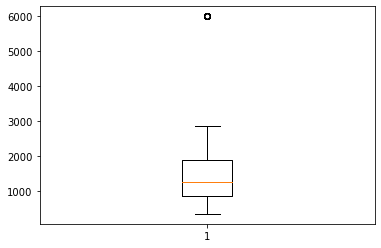

In [15]:
# outlier treatment for Price
df_rent2=df_rent.copy()
plt.boxplot(df_rent2.Price)
Q1 = df_rent2.Price.quantile(0.25)
Q3 = df_rent2.Price.quantile(0.75)
IQR = Q3 - Q1
df_rent2 = df_rent[(df_rent2.Price >= Q1 - 1.5*IQR) & (df_rent2.Price <= Q3 + 1.5*IQR)]


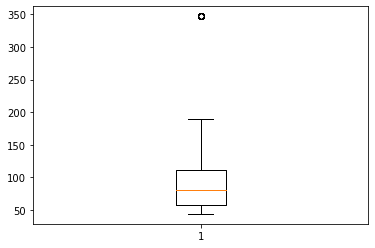

In [16]:
# outlier treatment for Size
plt.boxplot(df_rent2.Size)
Q1 = df_rent2.Size.quantile(0.25)
Q3 = df_rent2.Size.quantile(0.75)
IQR = Q3 - Q1
df_rent2 = df_rent2[(df_rent2.Size >= Q1 - 1.5*IQR) & (df_rent2.Size <= Q3 + 1.5*IQR)]

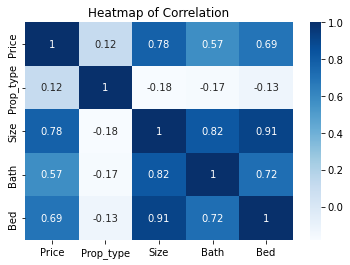

In [17]:
# Heatmap of correlation between variables
sns.heatmap(df_rent2.corr(), cmap='Blues', annot=True)
plt.title('Heatmap of Correlation')
plt.show()

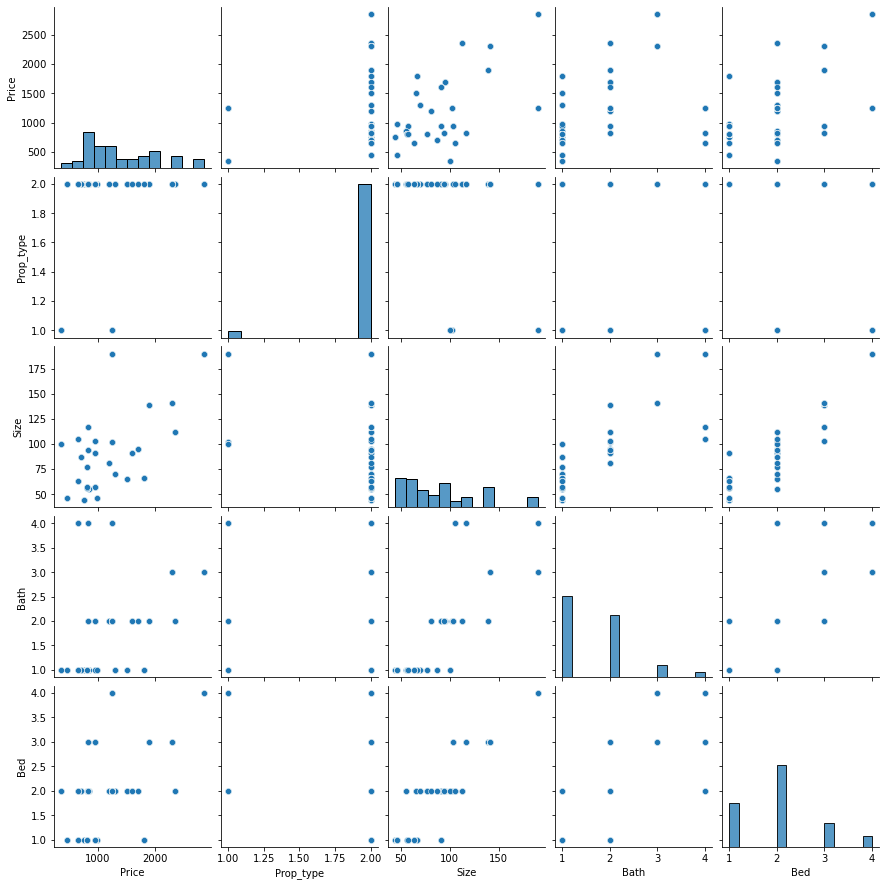

In [18]:
sns.pairplot(df_rent2)
plt.show()

In [19]:
df_rent2.to_csv(r'rent_eda_temp.csv', index = False, header=True)

In [20]:
rent=df_rent2.copy()

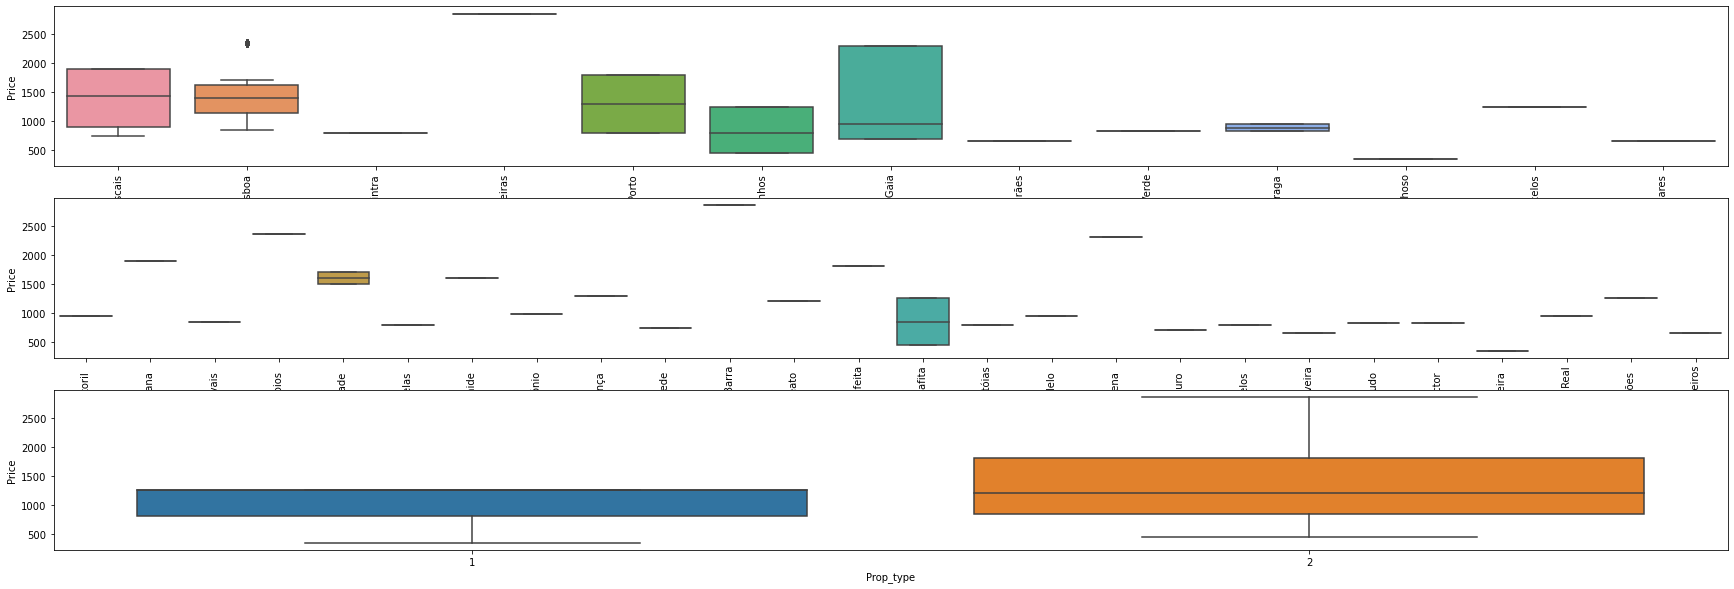

In [21]:
plt.figure(figsize=(30, 10))

plt.subplot(3,1,1)
sns.boxplot(x = 'City', y = 'Price', data = rent)
plt.xticks(rotation='vertical')
plt.subplot(3,1,2)
sns.boxplot(x = 'Division', y = 'Price', data = rent)
plt.xticks(rotation='vertical')
plt.subplot(3,1,3)
sns.boxplot(x = 'Prop_type', y = 'Price', data = rent)
plt.show()

In [22]:
# dropping prop_type
rent.drop('Prop_type',1, inplace=True) 

In [23]:
rent2 = rent.copy()
city_count = rent2['City'].value_counts()
city_count.head(10)

Lisboa               368
Cascais              184
Matosinhos            51
Vila Nova de Gaia     51
Sintra                46
Oeiras                46
Porto                 34
Braga                 18
Guimarães              9
Vila Verde             9
Name: City, dtype: int64

In [24]:
# categorize minor divisions as 'other'
minor_city = list(city_count[city_count <= 33].index)
rent2['City'] = rent2['City'].replace(minor_city, 'Other')
rent2['City'].value_counts()

Lisboa               368
Cascais              184
Other                 63
Matosinhos            51
Vila Nova de Gaia     51
Sintra                46
Oeiras                46
Porto                 34
Name: City, dtype: int64

<AxesSubplot:xlabel='City', ylabel='Price'>

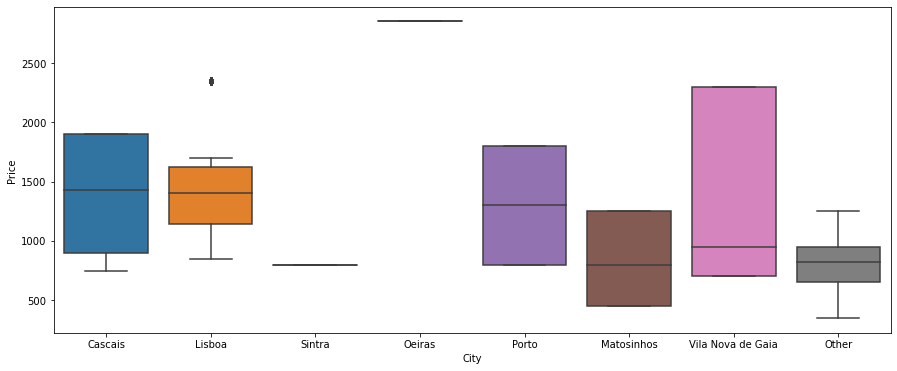

In [25]:
plt.figure(figsize=(15, 6))
sns.boxplot(x = 'City', y = 'Price', data = rent2)

In [26]:
# creating dummy variables for Division
rent2.drop('Division',1, inplace=True) # dropping Division column
rent2 = pd.get_dummies(rent2, drop_first = True)

In [27]:
rent2['Price'] = rent2['Price'].astype('int64')
rent2.head()

,Price,Size,Bath,Bed,City_Lisboa,City_Matosinhos,City_Oeiras,City_Other,City_Porto,City_Sintra,City_Vila Nova de Gaia
0,950,57,1,1,0,0,0,0,0,0,0
1,1900,139,2,3,0,0,0,0,0,0,0
2,1900,139,2,3,0,0,0,0,0,0,0
3,850,55,1,2,1,0,0,0,0,0,0
4,2350,112,2,2,1,0,0,0,0,0,0


In [28]:
rent2.describe()

,Price,Size,Bath,Bed,City_Lisboa,City_Matosinhos,City_Oeiras,City_Other,City_Porto,City_Sintra,City_Vila Nova de Gaia
count,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000
mean,1366.992883,90.078292,1.634638,2.005931,0.436536,0.060498,0.054567,0.074733,0.040332,0.054567,0.060498
std,617.048663,39.160563,0.757754,0.829224,0.496250,0.238549,0.227268,0.263116,0.196854,0.227268,0.238549
min,350.000000,44.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,850.000000,57.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1250.000000,81.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1800.000000,112.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2850.000000,190.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


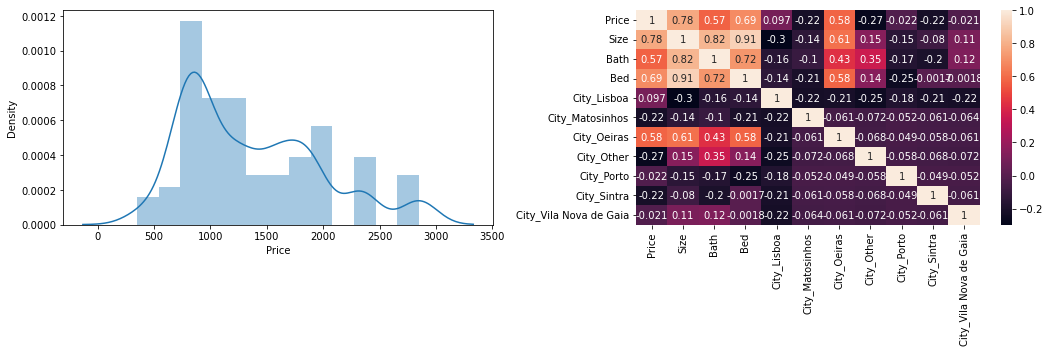

In [29]:
# histogram and heat map
rent_corr = rent2.corr()
fig, axs = plt.subplots(1,2, figsize=[15,5])
sns.distplot(rent2['Price'], ax=axs[0])
sns.heatmap(rent_corr, ax=axs[1], annot=True)
fig.tight_layout()

In [30]:
rent2.to_csv(r'Rent_After_Eda.csv', index = False, header=True)